# 라이브러리 임포트

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)  #seed값 맞추기

# 데이터 불러오기(학습 데이터, 테스트 데이터)
* 데이터 분석 단계에서 생성한 농구 선수 포지션 예측하기의 학습 데이터 및 테스트 데이터를 불러오기

In [47]:
train = pd.read_csv('data/csv/basketball_train.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

In [48]:
print(train.shape[0]) #훈련용 데이터셋 갯수
print(train.shape[1]) #feature의 갯수

print(test.shape[0])  #테스트용 데이터 셋 갯수
print(train.shape[1]) #feature의 갯수

80
5
20
5


# - 최적의 k 찾기 (Cross Validation - 교차검증)
* 최적의 K값을 찾는 것

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#모델생성은 sklearn으로

# 최적의 K값 찾기, k값의 범위는 3 ~ 전체 데이터 수 /2 (반만 해도 됨)
max_k_range = train.shape[0] //2 #(몫만 가져가기)
k_list =[]

for i in range(3, max_k_range,2):
    k_list.append(i) #3, 5, 7, ... , 39
    
cross_validation_scores =[]
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]


#10-fold 교차 검증
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)    #knn 변수를 선언해 모델에 접근
    scores=cross_val_score(knn, x_train, y_train.values.ravel(), cv =10,scoring='accuracy')#crossvalidation
    #knn 최적의 값, 훈련할 데이터 넣어주기(2차원데이터로 받게 되어 있음), 정답 넣어주기(1차원데이터로) 
    #cv = fold 수, scoring: 정확도
    cross_validation_scores.append(scores.mean()) #19개의 데이터
    
cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

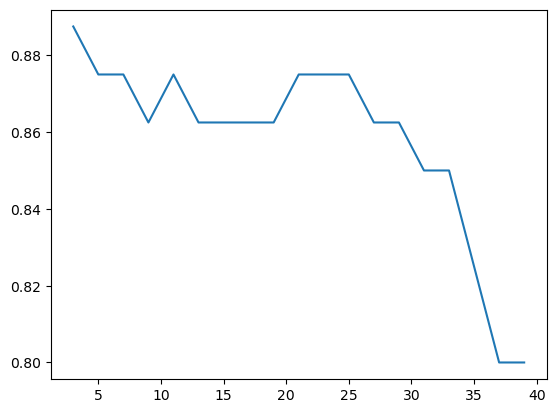

In [50]:
# 시각화
plt.plot(k_list,cross_validation_scores)
plt.show()

In [51]:
#최적의 k값
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k : ' + str(k))

The best number of k : 3


### - 2개의 특징으로 예측하기(3점슛, 블로킹)

In [52]:
knn = KNeighborsClassifier(n_neighbors=k)
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

#학습시키기 : fit()
knn.fit(x_train, y_train.values.ravel())
#입력되어 있는 데이터가 다 다르기 때문에 알 수 없음


KNeighborsClassifier(n_neighbors=3)

In [54]:
#테스트하기

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test) #입력으로 데이터만 넣어줌 

In [55]:
comprison = pd.DataFrame({'predition:':pred, 'answer:':y_test.values.ravel()})
comprison

,predition:,answer:
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [57]:
from sklearn.metrics import accuracy_score

In [62]:
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.95


# 3개의 특징으로 예측하기

In [59]:
knn = KNeighborsClassifier(n_neighbors=k)
x_train = train[['3P', 'BLK','TRB']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [60]:
x_test = test[['3P', 'BLK','TRB']]
y_test = test[['Pos']]
pred = knn.predict(x_test)
comprison = pd.DataFrame({'predition:':pred, 'answer:':y_test.values.ravel()})
comprison

,predition:,answer:
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [61]:
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), pred)))   # 19/20

accuracy : 0.95
